<a href="https://colab.research.google.com/github/GabrielaSchmitt/Data-Science-studies/blob/main/Random_Forests_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
boston = datasets.load_boston()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [5]:
df['price'] = boston.target

In [6]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [8]:
X, y = boston.data, boston.target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [10]:
scores = {}
resultados = {}
for trees in [5, 10, 25, 50, 100, 300]:
  print('Treinando com %d classificadores' % trees)
  clf = RandomForestRegressor(n_estimators=trees, max_depth=10, random_state=12345)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  resultados[trees] = y_pred
  scores[trees] = r2_score(y_test, y_pred)
  print('R2: %f' % scores[trees])

Treinando com 5 classificadores
R2: 0.858971
Treinando com 10 classificadores
R2: 0.868148
Treinando com 25 classificadores
R2: 0.881538
Treinando com 50 classificadores
R2: 0.893205
Treinando com 100 classificadores
R2: 0.894686
Treinando com 300 classificadores
R2: 0.895101


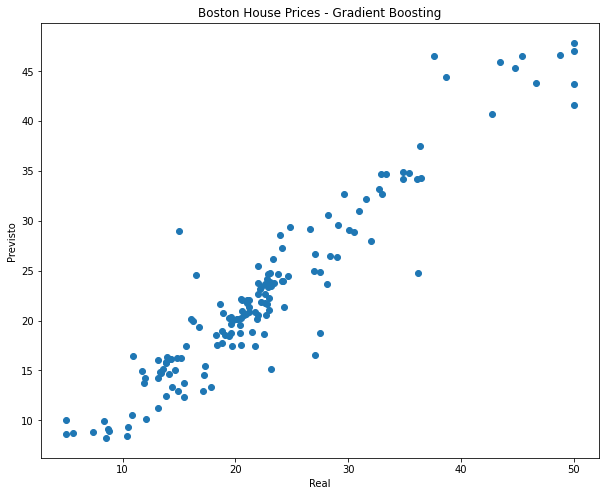

In [11]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.title('Boston House Prices - Gradient Boosting')
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.show()

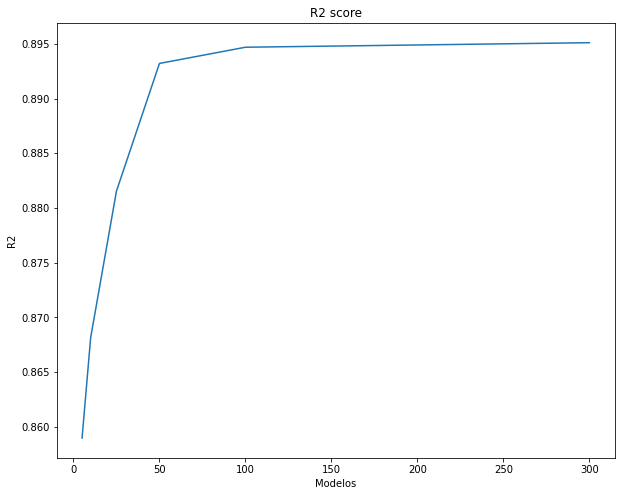

In [12]:
plt.figure(figsize=(10, 8))
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel('Modelos')
plt.ylabel('R2')
plt.title('R2 score')
plt.show()

In [13]:
y_pred[0:10]

array([32.6958497 , 24.83165836,  8.69486041, 21.31970812, 12.95569762,
       23.41107221, 18.9280473 , 14.99358461, 20.26750467, 27.98536184])

In [14]:
y_test[0:10]

array([33. , 27.5,  5.6, 21.2, 14.9, 22.3, 18.8, 14.6, 19.4, 32. ])